In [1]:
import qiskit
qiskit.__version__

'0.21.0'

In [2]:
qiskit.__qiskit_version__

{'qiskit-terra': '0.21.0', 'qiskit-aer': '0.10.4', 'qiskit-ignis': '0.7.1', 'qiskit-ibmq-provider': '0.19.2', 'qiskit': '0.37.0', 'qiskit-nature': None, 'qiskit-finance': None, 'qiskit-optimization': None, 'qiskit-machine-learning': None}

# Question 9
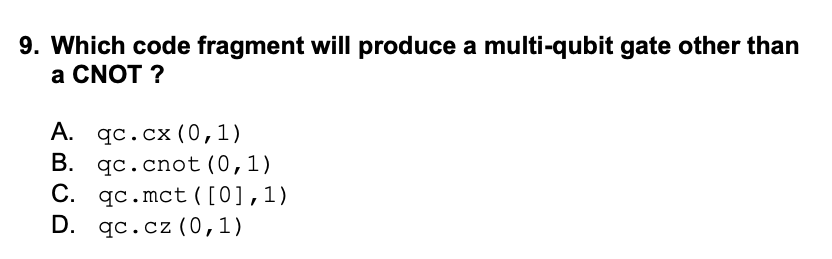

In [3]:
#Import the required packages
from qiskit import QuantumCircuit, QuantumRegister,ClassicalRegister,Aer,execute
from qiskit.visualization import *


## 1. OPTIONS A, B and C belong to the controlled gates section.

## 2. We have cx, cnot and cz belong to the 2-qubit controlled gates.

## 3. where 1 qubit is control and other qubit is target.

## 4. Target qubit is flipped only when the control qubit/s is/are in state |1>

- i.e if control is in state 1 then target qubit is flipped from |0> to |1> or |1> to |0> 

## 5. We make a control qubit to be in state |1> by simply applying a X gate.

We can refer to more details here : 
- https://qiskit.org/textbook/ch-gates/multiple-qubits-entangled-states.html

Summary of quantum Operations from Qiskit Textbook
- https://qiskit.org/documentation/tutorials/circuits/3_summary_of_quantum_operations.html

# Let's us now consider the options

## OPTION A : cx

- called as controlled not gate
- 2-qubit gate
- first qubit is control and second qubit is the target
- Flips the target qubit when the control qubit  is in state 1.



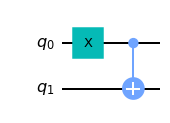

In [4]:
qc1=QuantumCircuit(2)
qc1.x(0)
qc1.cx(0,1)
qc1.draw('mpl')

In [5]:
backend=Aer.get_backend('statevector_simulator')
job=execute(qc1,backend)
result=job.result()
sv=result.get_statevector()
sv.draw(output="latex")

<IPython.core.display.Latex object>

# OPTION B : cnot  ( alias to cx)  

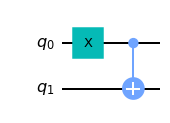

In [6]:
qc2=QuantumCircuit(2)
qc2.x(0)
qc2.cnot(0,1)
qc2.draw('mpl')

In [7]:
backend=Aer.get_backend('statevector_simulator')
job=execute(qc2,backend)
result=job.result()
sv=result.get_statevector()
sv.draw(output="latex")

<IPython.core.display.Latex object>

## OPTION C : mct  called as multi-control Toffoli gate

## Toffoli gate is a 3-qubit gate with 2 control qubits and 1 target qubit.

## To create mct ,we simply create with a list of control qubits and a target qubit.

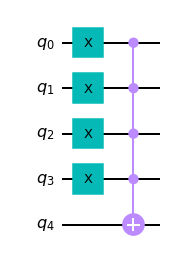

In [8]:
# We create 5-qubit mct gate
# We have a list of control qubits :0,1,2,3 and a target qubit 4.
qc3=QuantumCircuit(5)
qc3.x(range(4))
qc3.mct([0,1,2,3],4)
qc3.draw('mpl')

In [9]:
backend=Aer.get_backend('statevector_simulator')
job=execute(qc3,backend)
result=job.result()
sv=result.get_statevector()
sv.draw(output="latex")

<IPython.core.display.Latex object>

## OPTION D : cz called as controlled Z gate

- Applies a Z gate on the target only when the control is in state |1>
- It simply applies a phase to the target qubit when the control qubit is in state |1>
- 2-qubit controlled gate
- This gate looks the same irrespective whether MSB or LSB is the control qubit 


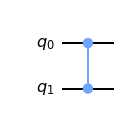

In [10]:
qc4=QuantumCircuit(2)
qc4.cz(0,1)
qc4.draw('mpl')

In [11]:
backend=Aer.get_backend('statevector_simulator')
job=execute(qc4,backend)
result=job.result()
sv=result.get_statevector()
print("statevector:", sv)
sv.draw(output="latex")

statevector: Statevector([ 1.+0.j,  0.+0.j,  0.+0.j, -0.+0.j],
            dims=(2, 2))


<IPython.core.display.Latex object>

In [12]:
backend=Aer.get_backend('unitary_simulator')
job=execute(qc4,backend)
result=job.result()
sv=result.get_unitary()
print(sv)


Operator([[ 1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j],
          [ 0.+0.j,  1.+0.j,  0.+0.j,  0.+0.j],
          [ 0.+0.j,  0.+0.j,  1.+0.j,  0.+0.j],
          [-0.+0.j, -0.+0.j, -0.+0.j, -1.+0.j]],
         input_dims=(2, 2), output_dims=(2, 2))


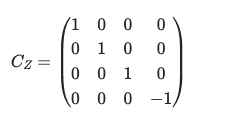

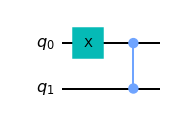

In [13]:
#Let's apply a X on the control qubit
qc4=QuantumCircuit(2)
qc4.x(0)
qc4.cz(0,1)
qc4.draw('mpl')

In [14]:
backend=Aer.get_backend('statevector_simulator')
job=execute(qc4,backend)
result=job.result()
sv=result.get_statevector()
print("statevector:", sv)
sv.draw(output="latex")

statevector: Statevector([ 0.+0.j,  1.+0.j,  0.+0.j, -0.+0.j],
            dims=(2, 2))


<IPython.core.display.Latex object>

In [15]:
backend=Aer.get_backend('unitary_simulator')
job=execute(qc4,backend)
result=job.result()
sv=result.get_unitary()
print(sv)

Operator([[ 0.+0.j,  1.+0.j,  0.+0.j,  0.+0.j],
          [ 1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j],
          [ 0.+0.j,  0.+0.j,  0.+0.j,  1.+0.j],
          [-0.+0.j, -0.+0.j, -1.+0.j, -0.+0.j]],
         input_dims=(2, 2), output_dims=(2, 2))


# Let's look at the qsphere to see the applied phase on the target qubit 

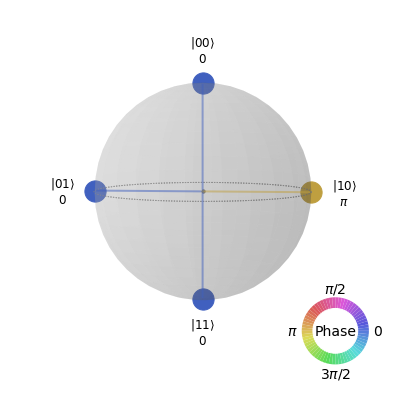

In [16]:
plot_state_qsphere(sv,show_state_phases=True)

# Correct Option:  C i.e mct is a multi-qubit toffoli gate 

## options A,B and D are 2-qubit gates